Deleting unwanted columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_train.csv"
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')
reader.drop(['categoryID', 'title',
       'attrsJSON', 'price', 'locationID', 'metroID', 'lat', 'lon'], axis=1, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv", encoding='utf-8')
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test.csv"
reader = pd.read_csv(test_info_path, encoding='utf-8')
reader.drop(['categoryID', 'title',
       'attrsJSON', 'price', 'locationID', 'metroID', 'lat', 'lon'], axis=1, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv", encoding='utf-8')

Data exploration

In [2]:
%%time
train_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv"
reader = pd.read_csv(train_info_path, encoding='utf-8')

Wall time: 3min 19s


In [5]:
descriptions = reader['description']

In [6]:
for i, desc in enumerate(descriptions):
    print(desc)
    print("=====================")
    if i == 100:
        break

Продам Камаз 6520 20 тонн
Весь в тюнинге.
Телефон в хорошем состоянии, трещин и сколов нет, за все время менялся только аккумулятор(поэтому заряд держит хорошо), остальное все родное, в целом работает отлично! В комплекте кабель. Обмен не интересен. Лежит без дела, только продажа.
Отличный подарок на новый год от "китайской apple"
Новый в упаковке. Коробку вместе вскроем)
Экран: 5 дюймов, 1080p, Sharp/JDI OGS (Возможно использование в перчатках)
Цвет корпуса: белый
Материалы корпуса: пластик, металл, стекло

Процессор: Qualcomm Snapdragon 801 (8X74AC, 2.5Ггц)
Видео: Adreno 330 (578 Мгц)
ОЗУ: 3Гб (LPDDR3 933Мгц)
Память: 16Гб (eMMC 5.0)

Камера задняя: 13Мп (Sony IMX214, f1.8, 6 линз)
Камера передняя: 8Мп (Sony IMX219, f1.8, 5 линз)

WiFi: 802.11 a/b/g/n/ac 2.4/5Ггц
Bluetooth: 4.0
Навигация: GPS/Glonass
Сенсоры: ИК-Порт, Датчик освещенности, Барометр, Компас, Датчик силы тяжести

Симкарта: MicroSIM

Аккумулятор: 3080 мАч (быстрая зарядка при 9V/1.2A или 5V/2A)

Дополнительно: Поддержка S

Магнитафон новый покупался недавно за 29990 сейчас по акции стоит  около25 т продаю срочно за 15т без торга  не понимающих прошу не беспокоить ....Срочно Срочно
Продам 3-к квартиру в 20-ти этажном 2-х секционный жилом дом со встроенными нежилыми помещениями, по адресу ул. Профессора Камая д.12., на 12/20 этажного кирпичного дома, площадью 84,5/49,9/13,5. Окна и балконные двери из ПВХ профиля с однокамерным энергосберегающим стеклопакетом. Ограждение лоджий - витражное с одинарным заполнением стеклом, переплеты из алюминиевого профиля. Инженерные сети, в т.ч. теплоснабжение, холодное водоснабжение, электроснабжение - централизованное; горячее водоснабжение - от теплового узла жилого комплекса. Качественная предчистовая отделка. Удачна планировка.
Все новые с вкладышами. Почтой отправляю! Есть еще много единичек и полных серий. Вотсап и вибер
Продам ваз 21103 в отличном состоянии. Двс 1.6 16кл. 4стеклоподьемника 2 подогрева сидений.сигнализация. Резина зима лето. Небольшой торг. СРОЧНО!!

Delete rows where there is no description or image array

In [13]:
rows_with_nan_img_array = reader.index[reader['images_array'].isna() == True].tolist()
print("Ads without images: " + str(len(rows_with_nan_img_array)))

rows_with_nan_desc = reader.index[reader['description'].isna() == True].tolist()
print("Ads without description: " + str(len(rows_with_nan_desc)))

rows_with_nan = list(set(rows_with_nan_img_array) | set(rows_with_nan_desc)) 
print("Total ads to be deleted: " + str(len(rows_with_nan)))

Ads without images: 398025
Ads without description: 105
Total ads to be deleted: 398128


In [14]:
reader.drop(index=rows_with_nan, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_train_processed.csv", encoding='utf-8')

Repeating same procedure for test set

In [15]:
%%time
test_info_path = "dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv"
reader = pd.read_csv(test_info_path, encoding='utf-8')

Wall time: 56.7 s


In [16]:
rows_with_nan_img_array = reader.index[reader['images_array'].isna() == True].tolist()
print("Ads without images: " + str(len(rows_with_nan_img_array)))

rows_with_nan_desc = reader.index[reader['description'].isna() == True].tolist()
print("Ads without description: " + str(len(rows_with_nan_desc)))

rows_with_nan = list(set(rows_with_nan_img_array) | set(rows_with_nan_desc)) 
print("Total ads to be deleted: " + str(len(rows_with_nan)))

Ads without images: 181980
Ads without description: 44
Total ads to be deleted: 182023


In [17]:
reader.drop(index=rows_with_nan, inplace=True)
reader.to_csv("dataset/avito-duplicate-ads-detection/ItemInfo_test_processed.csv", encoding='utf-8')

In [7]:
lengths = {}
for desc in descriptions:    

    length = len(str(desc))
    if length in lengths.keys():
        lengths[length] = lengths[length] + 1
    else:
        lengths[length] = 1

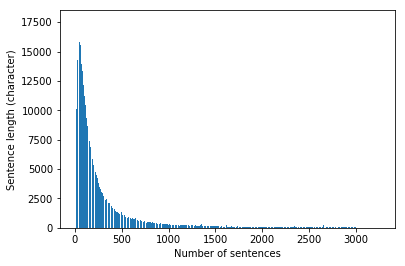

In [8]:
plt.bar(list(lengths.keys()), list(lengths.values()))
plt.xlabel('Number of sentences')
plt.ylabel("Sentence length (character)")
plt.show()
savefig("Number_of_characters_distribution.pdf", bbox_inches='tight')

In [9]:
lengths = {}
for desc in descriptions:    
    length = len(str(desc).split())
    if length in lengths.keys():
        lengths[length] = lengths[length] + 1
    else:
        lengths[length] = 1

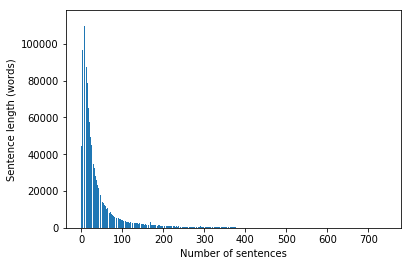

In [10]:
plt.bar(list(lengths.keys()), list(lengths.values()))
plt.xlabel('Number of sentences')
plt.ylabel('Sentence length (words)')
plt.show()
savefig("Number_of_words_distribution.pdf", bbox_inches='tight')

398025

105

398128